In [3]:
# handling data 
import numpy as np 
import pandas as pd 

from sklearn.ensemble import RandomForestClassifier

import pickle

from analyseModel import results
from hyperparameterTuning import hyperparamTraining as hpt 

In [4]:
file = open('../../data/ML_models/model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [5]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
columns = data['x_feature']

******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7558552164655784

classification report :
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1036
           1       0.53      0.60      0.57       373

    accuracy                           0.76      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409



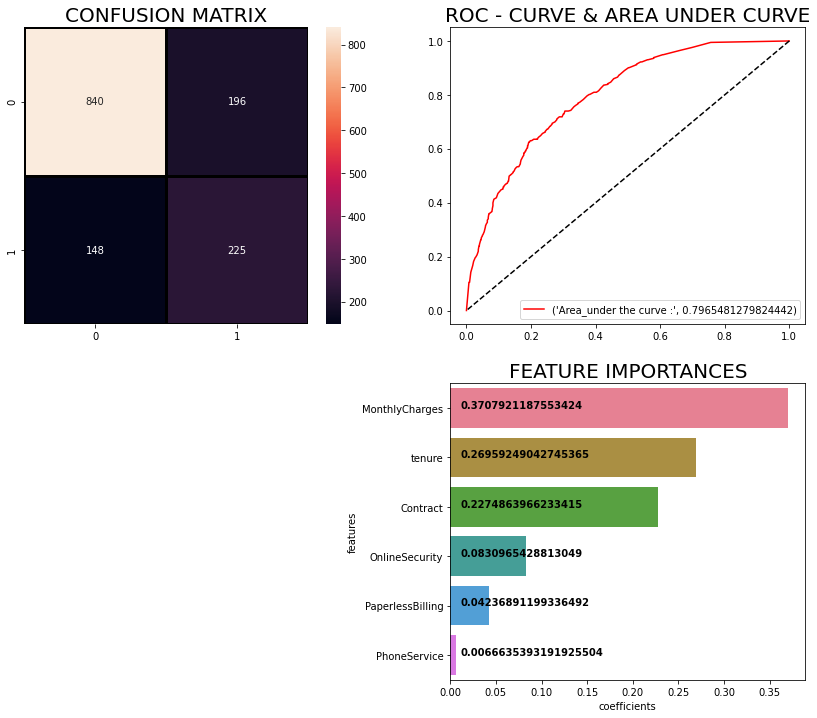

In [6]:
rf =RandomForestClassifier()
results(rf, x_train, y_train, x_test, y_test, "feat", columns)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\loc

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'n_estimators': 7}
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       n_estimators=7)
******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7473385379701917

classification report :
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1036
           1       0.51      0.81      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



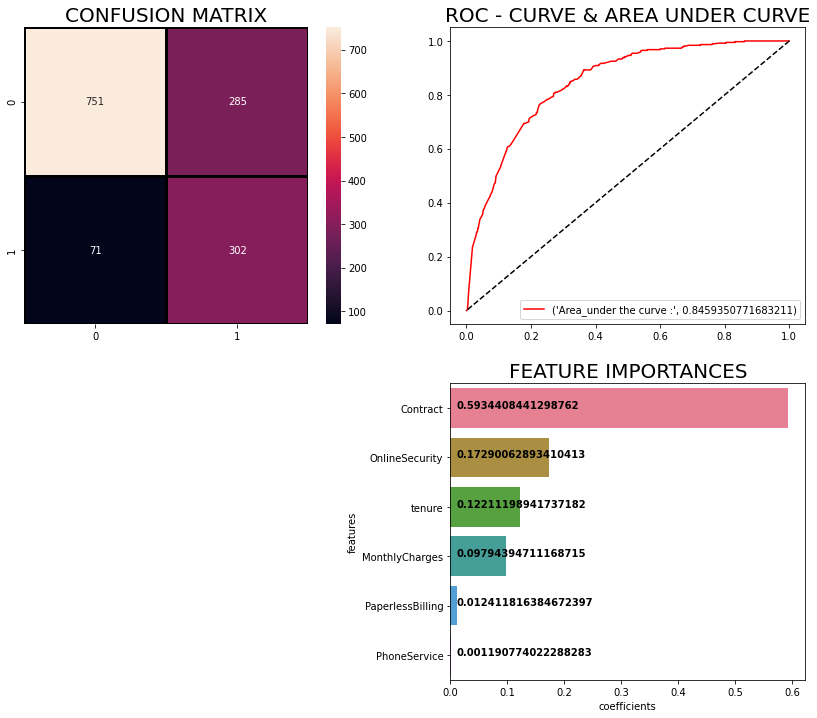

In [7]:
param = {
    'n_estimators' : [5, 7, 9], 
    'max_depth' : [3, 4, 5], 
    'min_samples_leaf' : [3, 5, 7],
    'criterion' : ['gini', 'entropy', 'log_loss']
}
rf =RandomForestClassifier()
rfModel = hpt(rf, x_train, y_train, x_test, y_test, param, "feat", columns)

In [9]:
file = open('../../data/ML_models/rfModel.pkl', 'wb')
pickle.dump(rfModel, file)